## Exploratory Data Analysis

Here is the description of all the variables / features available in the dataset which will help you to perform EDA.

Predicts the total ride duration of taxi trips in New York city.

## Data Dictionary

Follow the variables in the dataset:

### Variables

<b>id</b> - a unique identifier for each trip

<b>vendor_id</b> - a code indicating the provider associated with the trip record

<b>pickup_datetime</b> - date and time when the meter was engaged

<b>dropoff_datetime</b> - date and time when the meter was disengaged

<b>passenger_count</b> - the number of passengers in the vehicle (driver entered value)

<b>pickup_longitude</b> - the longitude where the meter was engaged

<b>pickup_latitude</b> - the latitude where the meter was engaged

<b>dropoff_longitude</b> - the longitude where the meter was disengaged

<b>dropoff_latitude</b> - the latitude where the meter was disengaged

<b>store_and_fwd_flag</b> - This flag indicates whether the trip record was<BR> 
held in vehicle memory before sending to the vendor because the vehicle did not have a<BR>
connection to the server (Y=store and forward; N=not a store and forward trip)<BR>

<b>trip_duration</b> - (target) duration of the trip in seconds, this is the diffence between <b>dropoff_datetime</b> and <b>pickup_datetime</b> 

    
    
### Hypothesis Generation
    
<b>Start datetime</b> - Weekends tend to have lesser trip duration due to less congestion
<b>Pickup and Drop Location</b> - Distance between the locations
<b>Weather</b> - If rainning the speed of car decrase    
<b>traffic</b>   If higher take more time to reach the engage/disengage

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")


Loading Packages

Let us load the packages needed for visualization and exploratory analysis


In [18]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [19]:
df.shape, df.columns

((729322, 11),
 Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
        'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'trip_duration'],
       dtype='object'))

We have data for 729322 trips with 11 columns. So, essentially we have 10 features and 1 target column which is trip_duration. Let us quickly look at the values for each column

In [10]:
df.iloc[1,:]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

<h3> Target Exploration</h3>

We are trying to predict the total ride duration of taxi trips.

Clearly, this is a  binary classification problem. Let's look at the target variable and find out how to predict the total ride duration of taxi trips in NYC.

In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## Numerical features

Let us look at the numerical features. From the description provided in the data dictionary and cell 8, we can see that we have the following numerical features. Let us quickly describe them to check the following:

* Count: Can be used to check for missing value count
* Mean: Mean of the variable
* Standard Deviation: Standard deviation of the variable
* Minimum: Minimum value of the variable
* Quantile values: 25, 50 (median) & 75% quantiles of the variable
* Maximum: Maximum value of the variable

In [13]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Notice that we will not directly used dtypes function to identify numerical columns but rather used business sense to select numerical features as we have seen from a sample record, follow soome observations about the data:

* The columns <b>id</b> and <b>vendor_id</b> are nominal.
* The columns <b>pickup_datetime</b> and <b>dropoff_datetime</b> are stored as object which must be converted to datetime for better analysis.
* The column <b>store_and_fwd_flag</b> is categorical

In [20]:
numerical_cols = [
    'passenger_count',
'pickup_longitude',
'pickup_latitude',
'dropoff_longitude',
'dropoff_latitude',
'trip_duration']
df[numerical_cols].describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


75% of trips go 1 or 2 passengers.
There is not miss data in these columns

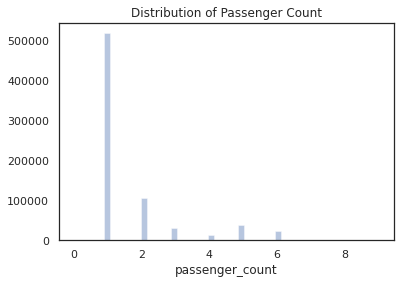

In [23]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Passenger Count for trip')
plt.show()

 <b>pickup_datetime</b> and <b>dropoff_datetime</b> converted to datetime
 

In [21]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [22]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


Verifying the condition:
* Weekends tend to have lesser trip duration due to less congestion
For check this, we need to convert date in days

In [ ]:
So its better to convert these dates into days of the week so a pattern can be found.

In [26]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [28]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [27]:
df['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

The maximum trips is friday and the lowest trips is in monday. So, the condition is half true, because Sarturday is the secound in trips and Sunday is the before the last.

### Conclusion about the data set:

*   Trip Duration varies from few seconds to more than 20 hours
*   Most trips are on Friday , Saturday and Thursday